In [1]:
import os
import torch
import torch.nn as nn
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader

In [2]:
os.chdir("/Users/eugenekim/PycharmProjects/aslAlphabetClassification")

In [3]:
from data.customDataset import ASLDataset

In [4]:
dataset = ASLDataset(csv_file = "data/aslDataset.csv", root_dir = "data/raw_data/asl_alphabet_complete", transform = transforms.ToTensor())

In [5]:
batch_size = 50
train_set, val_set = torch.utils.data.random_split(dataset, [1200, 250])
train_loader = DataLoader(dataset=train_set, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(dataset=val_set, batch_size = batch_size*2)

In [6]:
for i, j in train_loader:
    print(i[0].shape)
    break

torch.Size([3, 200, 200])


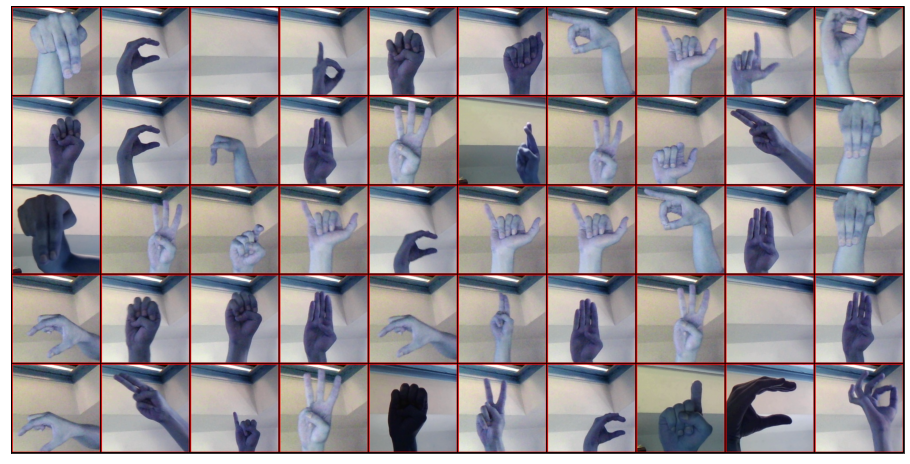

In [7]:
def show_batch(dl):
    for images, labels in dl:
        fig,ax = plt.subplots(figsize=(16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=10).permute(1,2,0))
        break

show_batch(train_loader)